In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv('dataset_bookstore/customers.csv', sep=",")
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
df_products = pd.read_csv('dataset_bookstore/products.csv', sep=",")
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
df_transactions = pd.read_csv('dataset_bookstore/transactions.csv', sep=",")
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


#### Nettoyage customers:

In [5]:
# Is null? 
print(df_customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [6]:


df_customers = df_customers[df_customers["birth"] >= 1900]
df_customers = df_customers[df_customers["birth"] <= 2022]
df_customers



,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


#### Nettoyage product:

In [7]:
print(df_products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


## Merging the tables 

In [8]:
df = pd.merge(df_transactions,df_products,on='id_prod',how='left')
df = pd.merge(df,df_customers,on='client_id',how='left')
df = df.reindex(columns=['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id', 'sex', 'birth'])
df

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1483,4.99,0.0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,2_226,65.75,2.0,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000
2,1_374,10.71,1.0,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979
3,0_2186,4.20,0.0,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963
4,0_1351,8.99,0.0,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980
...,...,...,...,...,...,...,...,...
337011,1_671,31.99,1.0,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969
337012,0_759,22.99,0.0,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991
337013,0_1256,11.03,0.0,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968
337014,2_227,50.99,2.0,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994


In [9]:
# Pushing age :
df['age'] = 2022 - df['birth']
df

,id_prod,price,categ,date,session_id,client_id,sex,birth,age
0,0_1483,4.99,0.0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45
1,2_226,65.75,2.0,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,22
2,1_374,10.71,1.0,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,43
3,0_2186,4.20,0.0,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,59
4,0_1351,8.99,0.0,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,42
...,...,...,...,...,...,...,...,...,...
337011,1_671,31.99,1.0,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,53
337012,0_759,22.99,0.0,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,31
337013,0_1256,11.03,0.0,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,54
337014,2_227,50.99,2.0,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,28


## 2) Analyse des données


### a) Indicateurs de tendances centrales

In [10]:
print("Moyenne des prix des produits vendus :", round(df['price'].mean(),2),)
print("Médiane des prix des produits vendus :", round(df['price'].median(),2),)
print("Catégorie de produits la plus vendue :", df['categ'].count())
print("Produit le plus vendu :", df['id_prod'].mode())
print("La majorité des achats ont été faits par des :", df['sex'].mode())

Moyenne des prix des produits vendus : 17.2
Médiane des prix des produits vendus : 13.9
Catégorie de produits la plus vendue : 336913
Produit le plus vendu : 0    1_369
Name: id_prod, dtype: object
La majorité des achats ont été faits par des : 0    m
Name: sex, dtype: object


### b) Corrélation entre sexes 

In [11]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création de sous-échantillons
    print("-"*20)
    print(gender)
    print("moyenne du prix des produits achetés :\n",round(subset['price'].mean(),2))
    print("médiane du prix des produits achetés :\n",subset['price'].median())
    print("somme du prix des produits achetés :\n",round(subset['price'].sum(),0))
    print("Catégorie de produits la plus vendue :", subset['categ'].mode())
    print("Produit le plus vendu :", subset['id_prod'].mode())
    print("moyenne de l'âge :\n",round(subset['age'].mean(),0))
    print("médiane de l'âge :\n",round(subset['age'].median(),0))

--------------------
f
moyenne du prix des produits achetés :
 17.06
médiane du prix des produits achetés :
 13.93
somme du prix des produits achetés :
 2859016.0
Catégorie de produits la plus vendue : 0    0.0
Name: categ, dtype: float64
Produit le plus vendu : 0    1_369
Name: id_prod, dtype: object
moyenne de l'âge :
 45.0
médiane de l'âge :
 43.0
--------------------
m
moyenne du prix des produits achetés :
 17.35
médiane du prix des produits achetés :
 13.82
somme du prix des produits achetés :
 2937362.0
Catégorie de produits la plus vendue : 0    0.0
Name: categ, dtype: float64
Produit le plus vendu : 0    1_417
Name: id_prod, dtype: object
moyenne de l'âge :
 44.0
médiane de l'âge :
 42.0


In [12]:
### c- Creating bins per age:

bins= [10,35,60,110]
labels = ['Jeune','Adulte','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,id_prod,price,categ,date,session_id,client_id,sex,birth,age,age_group
0,0_1483,4.99,0.0,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,Adulte
1,2_226,65.75,2.0,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,22,Jeune
2,1_374,10.71,1.0,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,43,Adulte
3,0_2186,4.20,0.0,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,59,Adulte
4,0_1351,8.99,0.0,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,42,Adulte
...,...,...,...,...,...,...,...,...,...,...
337011,1_671,31.99,1.0,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,53,Adulte
337012,0_759,22.99,0.0,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,31,Jeune
337013,0_1256,11.03,0.0,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,54,Adulte
337014,2_227,50.99,2.0,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,28,Jeune


In [13]:
for label in df["age_group"].unique():
    subset = df[df.age_group == label] # Création de sous-échantillons
    print("-"*20)
    print(label)
    print("moyenne du prix des produits achetés :\n",round(subset['price'].mean(),2))
    print("médiane du prix des produits achetés :\n",subset['price'].median())
    print("somme du prix des produits achetés :\n",round(subset['price'].sum(),0))
    print("Catégorie de produits la plus vendue :", subset['categ'].mode())
    print("Produit le plus vendu :", subset['id_prod'].mode())
    print("moyenne de l'âge :\n",round(subset['age'].mean(),0))
    print("médiane de l'âge :\n",round(subset['age'].median(),0))

--------------------
Adulte
moyenne du prix des produits achetés :
 13.77
médiane du prix des produits achetés :
 12.71
somme du prix des produits achetés :
 2966855.0
Catégorie de produits la plus vendue : 0    0.0
Name: categ, dtype: float64
Produit le plus vendu : 0    1_369
Name: id_prod, dtype: object
moyenne de l'âge :
 45.0
médiane de l'âge :
 44.0
--------------------
Jeune
moyenne du prix des produits achetés :
 27.18
médiane du prix des produits achetés :
 15.99
somme du prix des produits achetés :
 2094126.0
Catégorie de produits la plus vendue : 0    0.0
Name: categ, dtype: float64
Produit le plus vendu : 0    2_102
Name: id_prod, dtype: object
moyenne de l'âge :
 28.0
médiane de l'âge :
 30.0
--------------------
Senior
moyenne du prix des produits achetés :
 16.58
médiane du prix des produits achetés :
 15.87
somme du prix des produits achetés :
 735397.0
Catégorie de produits la plus vendue : 0    1.0
Name: categ, dtype: float64
Produit le plus vendu : 0    1_369
Name: i

In [14]:


print(round(df.groupby('sex')['price'].mean(),2))
print(round(df.groupby('sex')['price'].agg('mean'),2))



sex
f    17.06
m    17.35
Name: price, dtype: float64
sex
f    17.06
m    17.35
Name: price, dtype: float64


In [15]:
print("mean :\n", df[['sex','age_group','price']].groupby(['sex','age_group']).mean())

mean :
                    price
sex age_group           
f   Jeune      26.287233
    Adulte     13.849687
    Senior     16.595036
m   Jeune      28.037087
    Adulte     13.688786
    Senior     16.557117


### c) indicateurs de dispersion

In [16]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création de sous-échantillons
    print("-"*20)
    print(gender)
    print("var price :\n",subset['price'].var(ddof=0))
    print("ect price :\n",subset['price'].std(ddof=0))

--------------------
f
var price :
 301.4797698880308
ect price :
 17.36317280591398
--------------------
m
var price :
 335.95304655871513
ect price :
 18.329021974964053


In [17]:
for gender in df["sex"].unique():
    subset = df[df.sex == gender] # Création de sous-échantillons
    print("-"*20)
    print(gender)
    for agegroup in df["age_group"].unique():
        subset = df[df["age_group"] == agegroup]
        print("-"*3)
        print(agegroup)
        print("var price :\n",subset['price'].var(ddof=0))
        print("ect price :\n",subset['price'].std(ddof=0))
#Résultats qui diffèrent de la cellule suivante car le calcul se fait ici sur le subset et pas la pop totale (?)

--------------------
f
---
Adulte
var price :
 76.44590559158605
ect price :
 8.743334923905527
---
Jeune
var price :
 986.2704994823603
ect price :
 31.4049438700718
---
Senior
var price :
 106.33467452537296
ect price :
 10.311870563839179
--------------------
m
---
Adulte
var price :
 76.44590559158605
ect price :
 8.743334923905527
---
Jeune
var price :
 986.2704994823603
ect price :
 31.4049438700718
---
Senior
var price :
 106.33467452537296
ect price :
 10.311870563839179


In [18]:


print("var :\n", df[['sex','age_group','price']].groupby(['sex','age_group']).var(ddof=0))
#Résultats qui diffèrent de la cellule précédente car le calcul se fait ici sur la pop totale et pas le subset (?)



var :
                      price
sex age_group             
f   Jeune       930.468153
    Adulte       79.089498
    Senior      106.400669
m   Jeune      1038.875150
    Adulte       73.885226
    Senior      106.256659


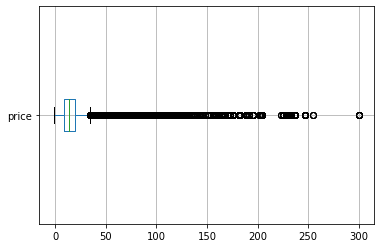

In [19]:


df.boxplot(column="price", vert=False)
plt.show()
#bcp de valeurs extrÃƒÂªmes trÃƒÂ¨s ÃƒÂ©levÃƒÂ©es (mais reste possible : livres collectors ?)



--------------------
f


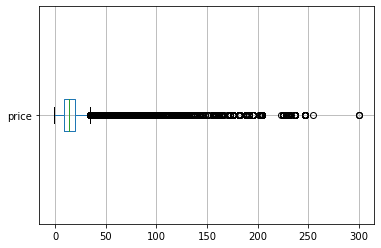

--------------------
m


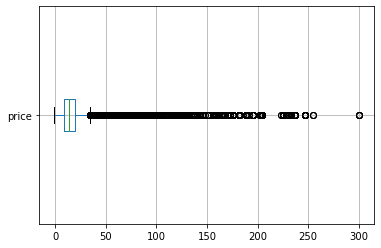

In [20]:


for gender in df["sex"].unique():
    subset = df[df.sex == gender] # CrÃƒÂ©ation du sous-ÃƒÂ©chantillon
    print("-"*20)
    print(gender)
    subset.boxplot(column="price", vert=False)
    plt.show()



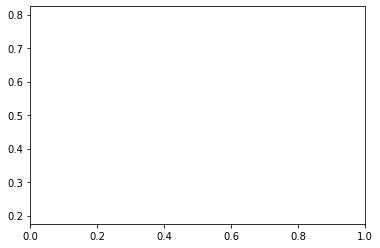

In [28]:
# Courbe de Lorenz et de Gini


prices = df['price'].values
n = len(prices)
lorenz = np.cumsum(np.sort(prices)) / prices.sum()
lorenz = np.append([0],lorenz)
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplÃƒÂ©mentaire d'ordonnÃƒÂ©e 0. Le premier segment commence ÃƒÂ  0-1/n, et le dernier termine ÃƒÂ  1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

